In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Data/cars_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            979 non-null    object 
 1   Year             974 non-null    float64
 2   Mileage          979 non-null    float64
 3   Engine_Size      964 non-null    float64
 4   Fuel_Type        982 non-null    object 
 5   Transmission     962 non-null    object 
 6   Previous_Owners  950 non-null    object 
 7   Price            987 non-null    float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [4]:
df.describe()

,Year,Mileage,Engine_Size,Price
count,974.000000,979.000000,964.000000,987.000000
mean,2016.320329,104185.955056,2.490560,8473.716312
std,4.050561,56333.931315,0.866082,6301.920977
min,2010.000000,5207.000000,1.000000,3000.000000
25%,2013.000000,54002.500000,1.800000,4068.000000
50%,2016.000000,104853.000000,2.500000,6426.000000
75%,2020.000000,155030.000000,3.200000,10917.000000
max,2023.000000,199812.000000,4.000000,43994.000000


In [5]:
df.head()

,Brand,Year,Mileage,Engine_Size,Fuel_Type,Transmission,Previous_Owners,Price
0,Kia,2015.0,110373.0,2.5,Electric,Manual,2,3000.0
1,Mercedes,2010.0,186144.0,1.3,Electric,Manual,5,4844.0
2,Nissan,2018.0,29574.0,2.6,Petrol,Manual,1,6628.0
3,Kia,2010.0,139502.0,2.4,Diesel,Automatic,NaN,3000.0
4,BMW,2014.0,148748.0,3.5,Diesel,Manual,1,6451.0


In [6]:
df.isnull().sum().sort_values()

Price              13
Fuel_Type          18
Brand              21
Mileage            21
Year               26
Engine_Size        36
Transmission       38
Previous_Owners    50
dtype: int64

In [7]:
df.dropna(subset=['Price'],inplace=True)

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer1=SimpleImputer(strategy='mean')

In [10]:
df[['Mileage','Engine_Size']]=imputer1.fit_transform(df[['Mileage','Engine_Size']])

In [11]:
df.isnull().sum().sort_values()

Mileage             0
Engine_Size         0
Price               0
Fuel_Type          12
Year               20
Brand              21
Transmission       25
Previous_Owners    42
dtype: int64

In [12]:
imputer2=SimpleImputer(strategy='most_frequent')

In [13]:
df[['Fuel_Type','Year','Brand','Transmission','Previous_Owners']]=imputer2.fit_transform(df[['Fuel_Type','Year','Brand','Transmission','Previous_Owners']])

In [14]:
df.isnull().sum().sort_values()

Brand              0
Year               0
Mileage            0
Engine_Size        0
Fuel_Type          0
Transmission       0
Previous_Owners    0
Price              0
dtype: int64

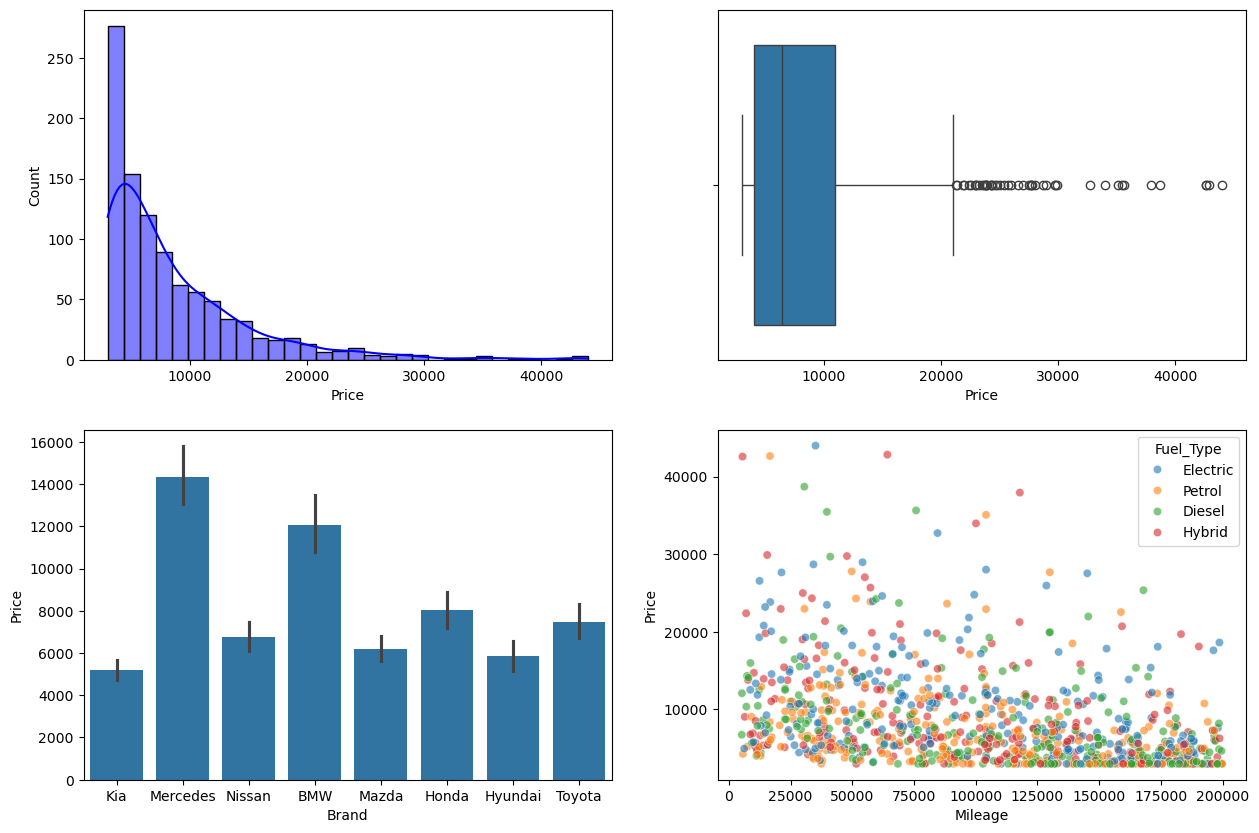

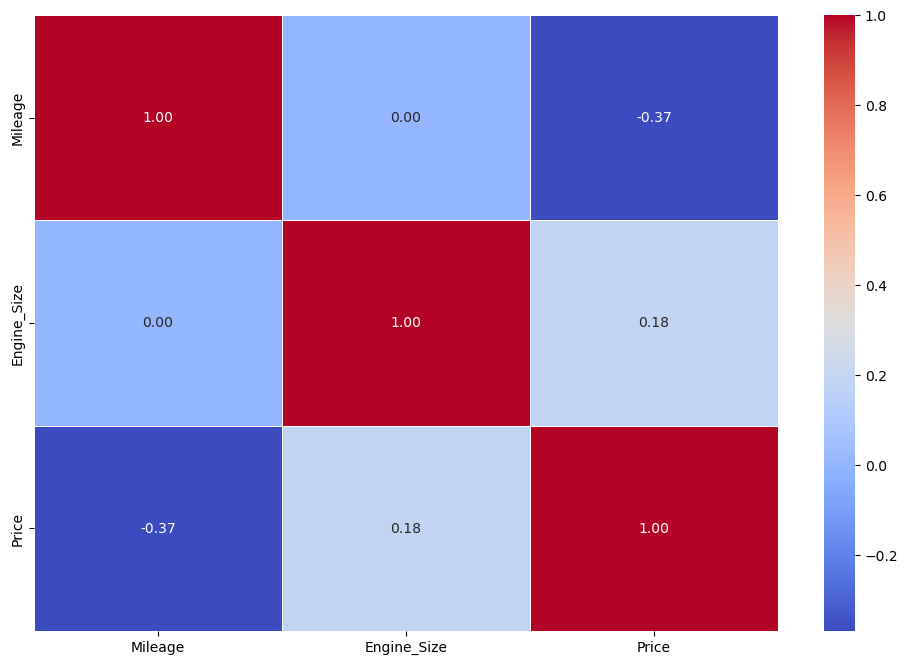

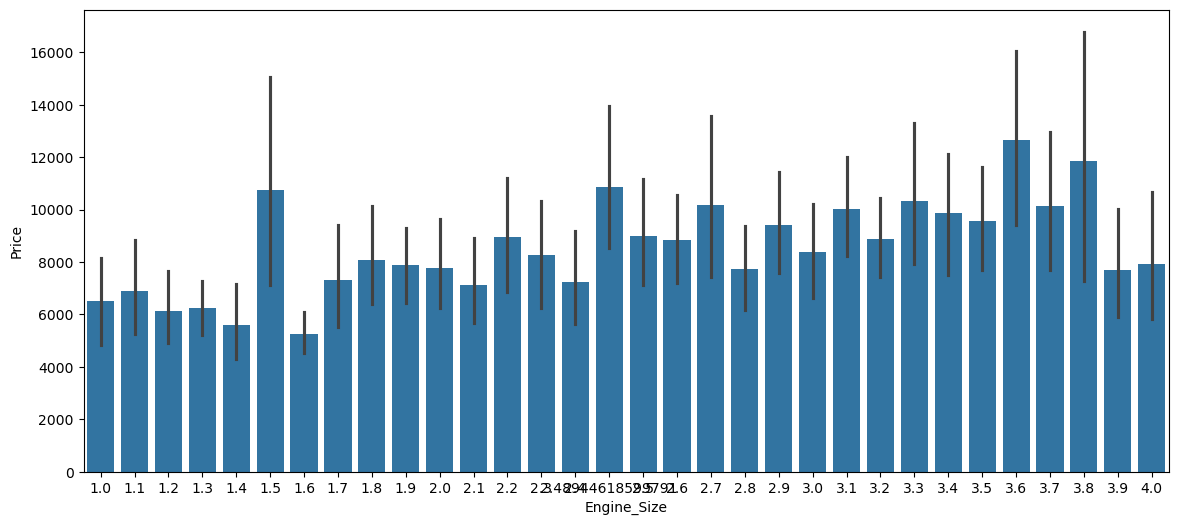

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True, color='blue')


plt.subplot(2, 2, 2)
sns.boxplot(x='Price', data=df)


plt.subplot(2, 2, 3)
sns.barplot(x='Brand', y='Price',data=df)


plt.subplot(2, 2, 4)
sns.scatterplot(x='Mileage', y='Price', data=df, hue='Fuel_Type', alpha=0.6)



plt.show()

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Engine_Size', y='Price',  data=df)

plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler,StandardScaler
rob=RobustScaler()
st=StandardScaler()

In [17]:
# df[['Year']]=st.fit_transform(df[['Year']])

In [18]:
df=pd.get_dummies(df)

In [19]:
df

,Mileage,Engine_Size,Price,Brand_BMW,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mazda,Brand_Mercedes,Brand_Nissan,...,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Previous_Owners_,Previous_Owners_1,Previous_Owners_2,Previous_Owners_3,Previous_Owners_4,Previous_Owners_5
0,110373.0,2.5,3000.0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,186144.0,1.3,4844.0,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,29574.0,2.6,6628.0,False,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,139502.0,2.4,3000.0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,148748.0,3.5,6451.0,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21052.0,1.8,13831.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
996,105689.0,2.0,6296.0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
997,183148.0,3.8,19708.0,False,False,False,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
998,189492.0,1.9,3283.0,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [20]:
df=df.astype(int)

In [21]:
from sklearn.preprocessing import RobustScaler,StandardScaler
rob=RobustScaler()
st=StandardScaler()

In [22]:
df[['Price','Mileage']]=rob.fit_transform(df[['Price','Mileage']])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop('Price',axis=1)
y=df['Price']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True,test_size=.3)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error,root_mean_squared_error


In [27]:
lr=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=10)

In [28]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
y_pred=lr.predict(X_test)

In [30]:

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
root=root_mean_squared_error(y_test,y_pred)
print('Linear Regression model' )
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score * 100:.2f}%")
print(f"Mean squared Error: {mse}")
print(f"root Mean squared Error: {root}")

Linear Regression model
Mean Absolute Error: 0.3079631116964893
R2 Score: 77.36%
Mean squared Error: 0.2156714030993392
root Mean squared Error: 0.46440435301506294


In [31]:
KNN.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",10
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [32]:
y_pred=KNN.predict(X_test)

In [33]:

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
root=root_mean_squared_error(y_test,y_pred)
print('K Neighbors model' )
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score * 100:.2f}%")
print(f"Mean squared Error: {mse}")
print(f"root Mean squared Error: {root}")

K Neighbors model
Mean Absolute Error: 0.48792657189503447
R2 Score: 49.99%
Mean squared Error: 0.47639503086931834
root Mean squared Error: 0.6902137573747124


<Axes: xlabel='Price'>

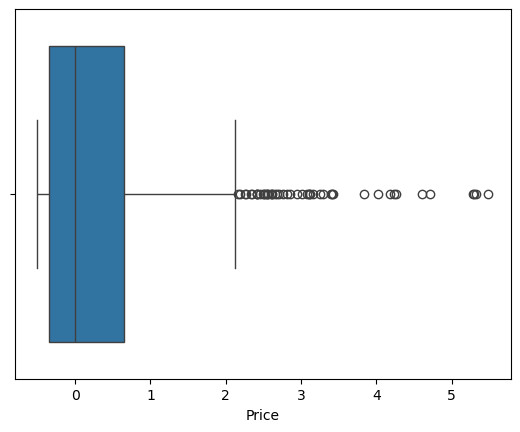

In [34]:
sns.boxplot(x='Price', data=df)


In [35]:
from models import run_regression_models,regression_models

In [36]:
result=run_regression_models(regression_models,X_train,X_test,y_train,y_test)

Learning rate set to 0.038612
0:	learn: 0.8849537	total: 46.3ms	remaining: 46.3s
1:	learn: 0.8705291	total: 47.4ms	remaining: 23.7s
2:	learn: 0.8582263	total: 48.3ms	remaining: 16.1s
3:	learn: 0.8445640	total: 50.4ms	remaining: 12.5s
4:	learn: 0.8330331	total: 51.6ms	remaining: 10.3s
5:	learn: 0.8196171	total: 52.4ms	remaining: 8.68s
6:	learn: 0.8103480	total: 53.2ms	remaining: 7.54s
7:	learn: 0.8008236	total: 55.3ms	remaining: 6.85s
8:	learn: 0.7909245	total: 56.6ms	remaining: 6.24s
9:	learn: 0.7810415	total: 57.5ms	remaining: 5.69s
10:	learn: 0.7722507	total: 58.1ms	remaining: 5.22s
11:	learn: 0.7633252	total: 59.4ms	remaining: 4.89s
12:	learn: 0.7552493	total: 60.2ms	remaining: 4.57s
13:	learn: 0.7471598	total: 61.1ms	remaining: 4.3s
14:	learn: 0.7378265	total: 61.8ms	remaining: 4.06s
15:	learn: 0.7286679	total: 62.6ms	remaining: 3.85s
16:	learn: 0.7203137	total: 63.4ms	remaining: 3.67s
17:	learn: 0.7133270	total: 64.2ms	remaining: 3.5s
18:	learn: 0.7068016	total: 65ms	remaining: 3.

In [37]:
result

,model,train_mse,test_mse,train_r2,test_r2
7,GradientBoosting,0.049359,0.197052,0.938217,0.793131
0,LinearRegression,0.192808,0.215671,0.758660,0.773583
1,Ridge,0.193001,0.217339,0.758420,0.771833
12,LGBMRegressor,0.087407,0.219731,0.890592,0.769322
11,CatBoostRegressor,0.008773,0.220064,0.989019,0.768972
9,HistGradient Boosting,0.087695,0.221320,0.890232,0.767654
6,RandomForest,0.036644,0.320883,0.954133,0.663130
10,XGBRFRegressor,0.151277,0.400098,0.810646,0.579968
4,KNN,0.294590,0.450529,0.631259,0.527024
5,DecisionTree,0.000000,0.466370,1.000000,0.510394
